# Chapter 4.1. Grammatical, Lexical, Semantic, and Textual Annotation

In [1]:
import sys
import os
sys.path.append(os.path.abspath("/home/jose/Dropbox/Doktorarbeit/"))
from lxml import etree
from reading_robot import load_data, get_metadata, tei2text, annotate_texts, annotate_ling
import pandas as pd
from collections import Counter
%matplotlib inline

In [2]:
wdir = "/home/jose/Dropbox/Doktorarbeit/novelasespanolas/"

# Transformation: from Master to Annotated

Use rules to split sentences and recognize direct-speech and narrative passages

In [4]:
annotate_texts.create_text_anno("/home/jose/cligs/ne/","master/ne0001.xml", "ds/") # use "master/*.xml" for the entire corpus

Use Freeling annotating tokens and Multiwords

In [6]:

annotate_ling.annotate_from_ds(wdir = "/home/jose/cligs/ne/", 
    input_dir = "ds/",
    temp_dir = "temp/",
    output_dir = "partialy_annotated/",
    file = "ne0001.xml", # use "*.xml" for the entire corpus
    xml_unit = "s",)

/home/jose/cligs/ne/partialy_annotated/ne0001
3965
converted --- 510.71431159973145 seconds ---
mean seconds for sentences 0.1288061089052679


In [9]:
annotate_ling.make_files_lighter(wdir = "/home/jose/cligs/ne/",  
    input_dir = "partialy_annotated/",
    output_dir = "partialy_annotated/",
    file = "ne0001.xml")

/home/jose/cligs/ne/partialy_annotated/ne0001


Add annotation about discursive particles, proverbs, order of frequency of people, WordNet lexnames and MariaX

In [4]:
annotate_ling.add_ling_annotation(wdir = "/home/jose/cligs/ne/",  
    input_dir = "partialy_annotated/",
    temp_dir = "temp/",
    output_dir = "annotated/",
    file = "ne0334.xml", # use "*.xml" for the entire corpus
    xml_unit = "s")

/home/jose/cligs/ne/annotated/ne0334
converted --- 7.318177938461304 seconds ---
mean seconds for sentences 0.03127461926549928


# Validation

In [4]:
from reading_robot import validate_tei

In [6]:
validate_tei.wellform_xml("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/annotated_lexnames/ne0334.xml")

number of problematics file:  0


In [ ]:
validate_tei.main("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/annotated_lexnames/ne0334.xml", "/home/jose/Dropbox/Doktorarbeit/novelasespanolas/new_format/cligs.rng")

ne0334.xml


# 4.1.4. Grammatical Annotation

In [4]:
root_document = etree.parse("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/annotated/ne0334.xml").getroot()


In [5]:
specific_namespaces = {'tei':'http://www.tei-c.org/ns/1.0','xi':'http://www.w3.org/2001/XInclude', 'cligs': 'https://cligs.hypotheses.org/ns/cligs'}


In [14]:
print(sorted(["@"+element for element in list(set([attr for w in root_document.xpath('.//tei:w', namespaces=specific_namespaces) for attr in w.attrib]))]))



['@case', '@ctag', '@degree', '@form', '@gen', '@lemma', '@mariax', '@mood', '@n', '@nec', '@neclass', '@num', '@ord_ent', '@person', '@pos', '@possessornum', '@possessorpers', '@punctenclose', '@tag', '@tense', '@type', '@wn', '@wnlex']


# 4.1.6. Semantic Annotation

In [6]:
mariax_connsa = pd.read_parquet("/home/jose/Dropbox/MTB/investigacion/mytoolbox/mariaX/resulting-data/catalogues_shared-CoNSSA_only-tokens_df.parquet")

In [7]:
mariax_connsa.shape

(1788, 33000)

In [8]:
mariax_connsa.head()

,a,ab,aba,abacería,abacá,abad,abada,abadejo,abadesa,abadía,...,óxido,úlcera,última,últimas,último,únicamente,único,úrico,útero,útil
sublema,,,,,,,,,,,,,,,,,,,,,
abandonar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abatir,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abeja,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abertura,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abiertamente,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
mariax_connsa.sum(axis=1).sort_values().tail(10)

sublema
escribir       752
tiempo         762
caballería     774
milicia        818
música         844
enfermedad     848
tejer          918
barco          920
vestir        1194
planta        1648
dtype: int64

In [23]:
mariax_connsa.sum(axis=1).sort_values().head(10)

sublema
denigrar       15
electrónica    21
imán           21
inminente      21
cáncer         21
desamparo      24
rebajar        24
comparación    24
adjetivo       27
adversativo    27
dtype: int64

In [18]:
mariax_connsa["_suma"] = mariax_connsa.sum(axis=1)

In [24]:
mariax_connsa["_suma"].mode()

0    64
dtype: int64

In [29]:
mariax_connsa["_suma"].mode()

0    64
dtype: int64

In [25]:
mariax_connsa["_suma"].quantile(0.25)

60.0

In [28]:
mariax_connsa["_suma"].quantile(0.5)

92.0

In [26]:
mariax_connsa["_suma"].quantile(0.75)

154.0

In [27]:
mariax_connsa["_suma"].quantile(0.75) - mariax_connsa["_suma"].quantile(0.25)

94.0

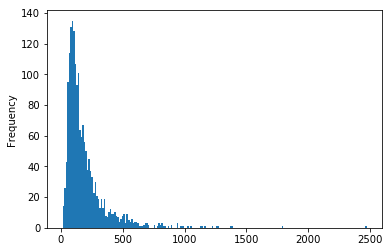

In [32]:
mariax_connsa.sum(axis=1).sort_values().plot.hist(bins=200)